In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets

### Activation Function

In [3]:
def unit_step_function(x):
    # return 1 if x > 0 else 0
    return np.where(x > 0 , 1 , 0)

## Perceptron Class

In [4]:
class PERCEPTRON:
    def __init__(self, learning_rate = 0.01, num_iters = 100):
        self.learning_rate  = learning_rate
        self.num_iters = num_iters
        self.activation_function = unit_step_function
        self.weights = None
        self.bias = None
    def fit(self, X, y):
        num_samples, num_features = X.shape
        
        #Initializing parameters
        self.weights = np.random.randn(num_features)
        self.bias = 0
        
        y_ = np.where( y >0 , 1, 0)
        
        #Computing the parameters
        for _ in range(self.num_iters):
            for idx,x_i in enumerate(X):
                linear_output = np.dot(x_i , self.weights.T) + self.bias
                y_pred = self.activation_function(linear_output)
                
                #Updating the parameters
                self.weights += self.learning_rate * ((y_[idx] - y_pred) * x_i)
                self.bias += self.learning_rate * (y_[idx] - y_pred)
                
        
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        prediction = self.activation_function(linear_output)
        return prediction

## Algorithm Inference

In [8]:
#centers = It defines how many clusters to generate the cordinates of the centers
#cluster_std = Controls the std_deviation of each cluster

data , labels = datasets.make_blobs(
    n_features=2, n_samples=150, centers=2, cluster_std=1.05, random_state=42
)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

##### Helper Function to calculate the Accuracy of our Algorithm

In [5]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

In [9]:
perceptron = PERCEPTRON(learning_rate=0.01, num_iters=1000)
perceptron.fit(X_train, y_train)
predictions = perceptron.predict(X_test)

In [12]:
acc = accuracy(y_test, predictions)
print("="*28, f"Accuracy:{acc*100:.2f}%", "="*28)

============================ Accuracy:100.00% ============================


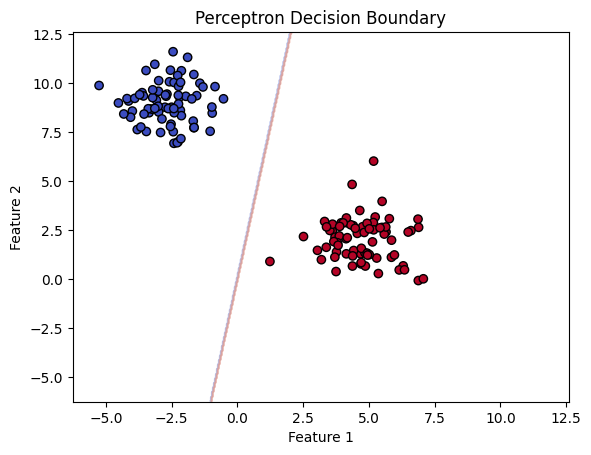

In [13]:
x_min, x_max = data[:,0].min() - 1, data[:, 1].max() + 1
y_min, y_max = data[:, 0].min() - 1, data[:, 1].max() + 1
xx , yy = np.meshgrid(np.linspace(x_min, x_max, 500), 
                      np.linspace(y_min, y_max, 500))
grid = np.c_[xx.ravel(), yy.ravel()]
result = perceptron.predict(grid).reshape(xx.shape)

plt.contour(xx, yy, result, alpha=0.3, cmap="coolwarm")
plt.scatter(data[:, 0], data[:, 1], c = labels, cmap="coolwarm", edgecolors='k')
plt.title("Perceptron Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()